# Bidding Simulation Model

Miller Construction Company must decide whether to make a bid on a construction project. Miller believes it will cost the company \\$10,000 to complete the project (if it wins the contract), and it will cost \\$350 to prepare a bid. However, there is
uncertainty about each of these. Upon further reflection, Miller assesses that the cost to complete the project has a triangular distribution with minimum, most likely, and maximum values \\$9000, \\$10,000, and \\$15,000.

Similarly, Miller assesses that the cost to prepare a bid has a triangular distribution with parameters \\$300, \\$350, and \\$500. (Note the skewness in these distributions. Miller recognizes that cost overruns are much more likely than cost underruns.)

Four potential competitors are going to bid against Miller. The lowest bid wins the contract, and the winner is then given the winning bid amount to complete the
project. Based on past history, Miller believes that each potential competitor will bid, independently of the others, with probability 0.5.

Miller also believes that each competitor’s bid will be a multiple of its (Miller’s) most likely cost to complete the project, where this multiple has a triangular distribution with minimum, most likely, and maximum values 0.9, 1.3, and 1.8, respectively.

If Miller decides to prepare a bid, its bid amount will be a multiple of \\$500 in the range \\$10,500 to \\$15,000. The company wants to use simulation to determine which strategy to use to maximize its expected profit.


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Inputs

In [3]:
bid_cost = {"left": 300, "mode": 350, "right": 500}
project_cost = {"left": 9000, "mode": 10000, "right": 15000}

In [4]:
num_competitors = 4
prob_competitors = 0.5
param_competitors = {"left": 0.9, "mode": 1.3, "right": 1.8}

In [5]:
millers_bid = np.linspace(10500, 15500, 11)

In [6]:
n_sim = 1000

In [7]:
sim_bid_cost = np.random.triangular(**bid_cost, size=n_sim)
sim_project_cost = np.random.triangular(**project_cost, size=n_sim)

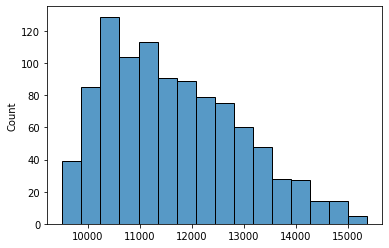

In [8]:
sns.histplot(sim_bid_cost + sim_project_cost);

In [9]:
sim_num_competitors = np.random.binomial(num_competitors, 0.5, size=n_sim)

In [10]:
sim_num_competitors.shape = (n_sim, 1)

In [11]:
def competitors_bids(n_competitors):
    return np.concatenate(
        (
            np.random.triangular(**param_competitors, size=n_competitors) * project_cost["mode"],
            np.full((4 - n_competitors[0],), np.inf)
        )
    )

In [12]:
competitors_bids = np.apply_along_axis(competitors_bids, 1, sim_num_competitors)

In [13]:
competitors_best_bid = np.min(competitors_bids, axis=1)

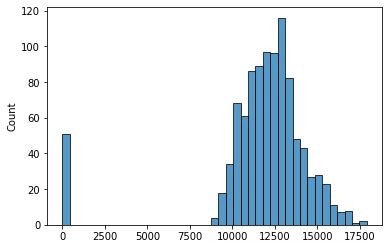

In [14]:
x = competitors_best_bid.copy()
x[x == np.inf] = -1
sns.histplot(x)
plt.show()

Expected mean profit: -1039.99, Won bids: 876


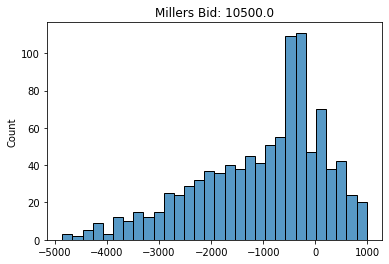

Expected mean profit: -576.48, Won bids: 800


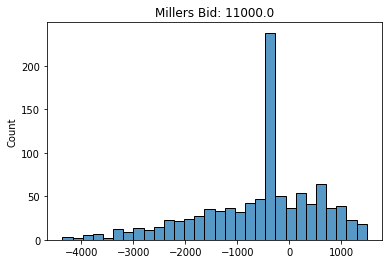

Expected mean profit: -225.38, Won bids: 698


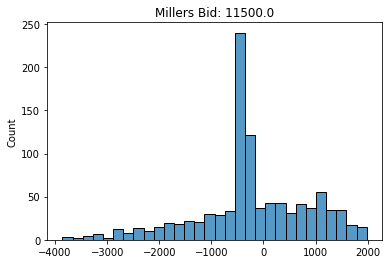

Expected mean profit: 34.40, Won bids: 600


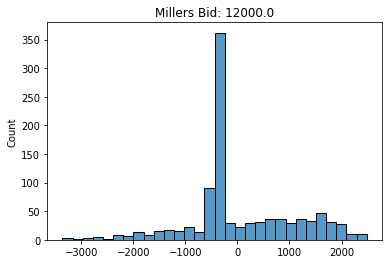

Expected mean profit: 197.35, Won bids: 484


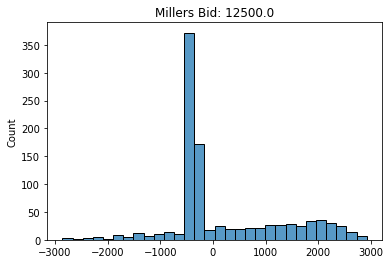

Expected mean profit: 257.51, Won bids: 369


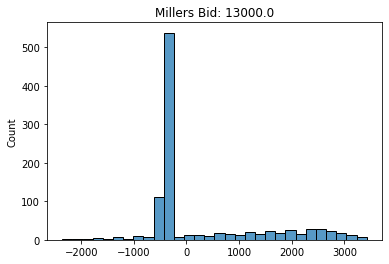

Expected mean profit: 179.96, Won bids: 252


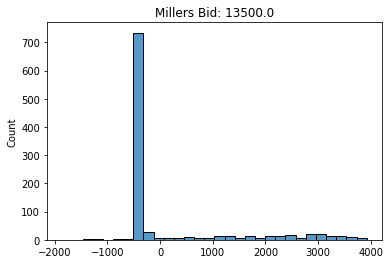

Expected mean profit: 164.44, Won bids: 198


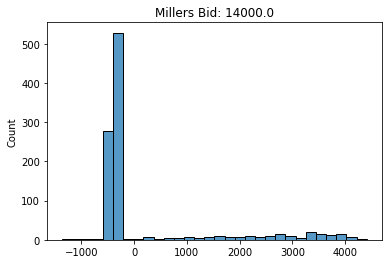

Expected mean profit: 123.33, Won bids: 153


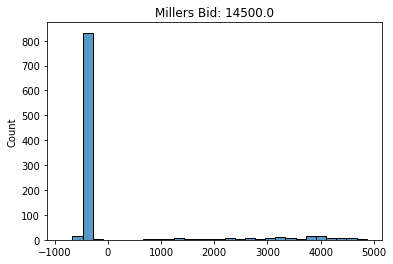

Expected mean profit: 78.89, Won bids: 122


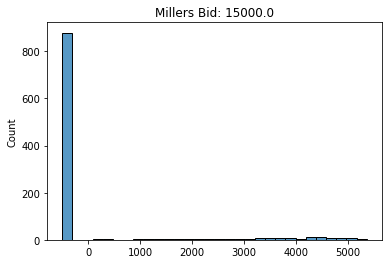

Expected mean profit: 31.66, Won bids: 95


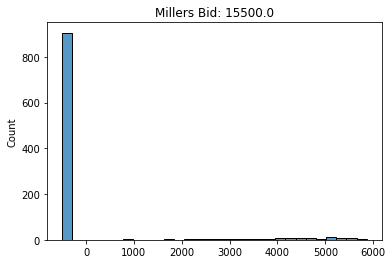

In [15]:
for bid in millers_bid:
    win_contract = competitors_best_bid > bid
    profit = (win_contract * (bid - sim_project_cost)) - sim_bid_cost
    sns.histplot(profit, bins=30).set(title=f'Millers Bid: {bid}')
    print(f"Expected mean profit: {profit.mean():.2f}, Won bids: {win_contract.sum()}")
    plt.show()

Note:
> This version is based in numpy, it is worth trying a Pandas version.